The following Python code is based upon a lecture from Dr. Anthony Fodor utilizing R programming language.

### Step 1: Generate data for two column vectors, where vector_1 = f(x) and vector_2 = f(x ^ 2) , such that 0<=x<=10 (step size = 0.1)

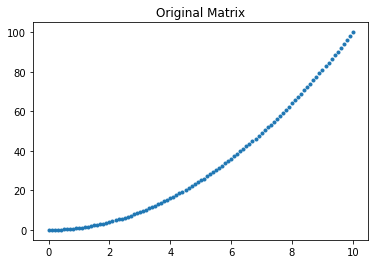

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,10+.1,.1)
xSquared = x**2
myMatrix =np.stack((x, xSquared), axis=1)
plt.title("Original Matrix") 
plt.scatter(myMatrix[:,0], myMatrix[:,1], marker='.')

### Step 2:  Create mean-centered matrix from original data

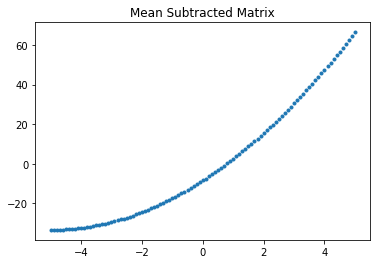

In [2]:
meanSubtractedMatrix = myMatrix - np.mean(myMatrix, axis=0)
plt.title("Mean Subtracted Matrix") 
plt.scatter(meanSubtractedMatrix[:,0], meanSubtractedMatrix[:,1], marker='.')

### Step 3:  Create covariance matrix from mean-centered matrix

In [3]:
covarianceMatrix = np.cov(meanSubtractedMatrix[:,0], meanSubtractedMatrix[:,1])
print("Covariance Matrix====>\n",covarianceMatrix)

Covariance Matrix====>
 [[  8.585    85.85   ]
 [ 85.85    916.86083]]


### Step 4:  Calculate eigenvectors and eigenvalues from covariance matrix

Eigenvalues in descending order:
 [9.24904122e+02 5.41707744e-01]


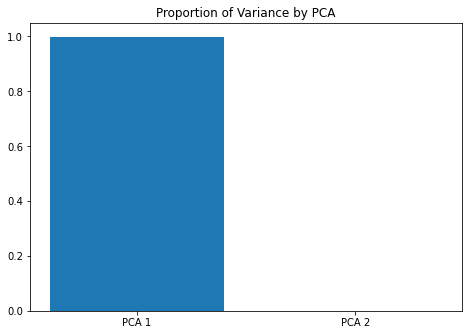

In [4]:
eVals, eVecs = np.linalg.eig(covarianceMatrix)
maxMinIndex = np.argsort(-eVals)
eVals = eVals[maxMinIndex]
print("Eigenvalues in descending order:\n",eVals)
# Arrange eigen vectors in descending order according to the values of their associated eigenvalues
eVecs = np.stack((eVecs[:,maxMinIndex[0]], eVecs[:,maxMinIndex[1]]),  axis=1)
fig = plt.figure()
plt.title("Mean Subtracted Matrix") 
ax = fig.add_axes([0,0,1,1])
pcas = ['PCA 1', 'PCA 2']
ax.set_title('Proportion of Variance by PCA')
ax.bar(pcas,eVals/sum(eVals))
plt.show()

### Step 5: Generate scores matrix

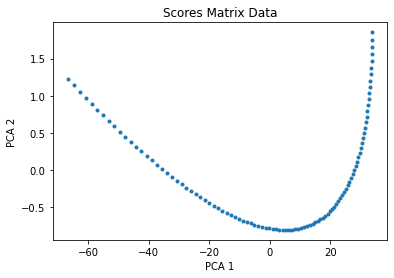

In [5]:
scoresMatrix = meanSubtractedMatrix @ eVecs
plt.title("Scores Matrix Data") 
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.scatter(scoresMatrix[:,0], scoresMatrix[:,1], marker='.')

### Step 6:  Partially recover data via PCA 1

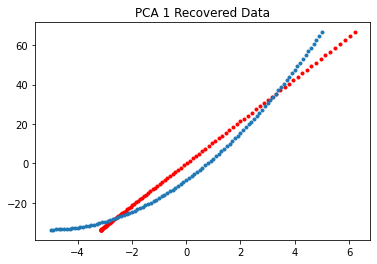

In [6]:
rotatedBackFromOneComponent = np.outer(scoresMatrix[:,0],  eVecs[:,0])
plt.title("PCA 1 Recovered Data") 
plt.scatter(rotatedBackFromOneComponent[:,0], rotatedBackFromOneComponent[:,1], marker='.', color="red")
plt.scatter(meanSubtractedMatrix[:,0], meanSubtractedMatrix[:,1], marker='.')

### Step 7:  Fully recover data via PCA 1 and PCA 2

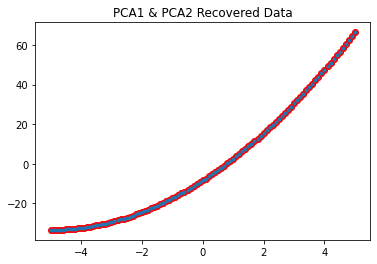

In [7]:
rotatedBackFromBothComponents = scoresMatrix @eVecs
plt.title("PCA1 & PCA2 Recovered Data") 
plt.scatter(rotatedBackFromBothComponents[:,0], rotatedBackFromBothComponents[:,1], marker='o', color="red")
plt.scatter(meanSubtractedMatrix[:,0], meanSubtractedMatrix[:,1], marker='.')